#4Ï£ºÏ∞® Í≥ºÏ†ú ÏÑ§Î™Ö
<p>Ïù¥Î≤à Í≥ºÏ†úÏùò Î™©ÌëúÎäî ÏÑ∏ÏÖò ÏãúÍ∞ÑÏóê Î∞∞Ïö¥ Generation model Ï§ë GANÏùÑ ÏßÅÏ†ë Ïã§ÏäµÌï¥Î≥¥Î©¥ÏÑú
supervisd learningÍ≥º Îã§Î•¥Í≤å discriminatorÏôÄ generatorÎ•º Ïñ¥ÎñªÍ≤å ÍµêÎåÄÎ°ú ÌïôÏäµÏãúÏºúÏïº ÌïòÎäîÏßÄ, Ïã§Ï†úÎ°ú Ïñ¥ÎñªÍ≤å Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÉùÏÑ±ÎêòÎäîÏßÄ Ïó¨Îü¨Î∂ÑÎì§Ïù¥ Î™∏ÏÜå ÎäêÎÅºÏãúÎäî Í≤ÉÏûÖÎãàÎã§.</p>

<p>GANÏùÑ ÏßÅÏ†ë scratchÎ∂ÄÌÑ∞ Íµ¨ÌòÑÌïòÎäî Í≤ÉÏùÄ Ïñ¥Î†§Ïö¥ ÏùºÏù¥Í∏∞Ïóê, Í∏ÄÎ°úÎßå Îì§ÏóàÎçò Í∞úÎÖêÏùÑ Ï¢Ä Îçî ÏÉÅÏÑ∏Ìûà ÏΩîÎìúÎ°ú Ïù¥Ìï¥ÌïòÎäîÎç∞ Ï§ëÏ†êÏùÑ ÎëêÏóàÏäµÎãàÎã§. üòÇ</p>

<p> Ï£ºÏñ¥ÏßÑ Í≥ºÏ†úÎäî Ï¥ù 8Í∞úÏù¥Î©∞ ÌõåÎ•≠Ìïú ÍµêÎ≥¥Ïû¨Ïù∏ CS231 Í≥µÏãù assignment3ÏùÑ ÎåÄÎã§Ïàò Ï∞∏Í≥†ÌïòÏòÄÏäµÎãàÎã§ üôáüèª‚Äç‚ôÇÔ∏è</p>

Ìï¥Îãπ Í≥ºÏ†úÎäî Îü∞ÌÉÄÏûÑ Ïó∞Í≤∞Ïãú 'GPU' ÏÇ¨Ïö©ÏùÑ Í∞ïÎ†•Ìûà Í∂åÏû•ÎìúÎ¶ΩÎãàÎã§!!

In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:

# Î≥∏Ïù∏Ïùò Îã§Ïö¥Î°úÎìúÎ∞õÏùÄ Ìè¥ÎçîÍ≤ΩÎ°úÏóê ÎßûÍ≤å ÏÑ§Ï†ïÌï¥Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§.
FOLDERNAME = "23_summer_cv/4th"
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# dataset Í≤ΩÎ°ú ÏÑ§Ï†ï
# if it doesn't already exist.
%cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
!bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

/content/drive/My Drive/23_summer_cv/4th/cs231n/datasets
bash: get_datasets.sh: No such file or directory
/content/drive/My Drive/23_summer_cv/4th


In [33]:
!pwd

/content/drive/MyDrive/23_summer_cv/4th/cs231n/datasets


# Generative Adversarial Networks (GANs)


In [41]:
# Setup cell.
import numpy as np
import torch
import torch.nn as nn
from torch.nn import init
import torchvision
import torchvision.transforms as T
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # Set default size of plots.
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def show_images(images):
    images = np.reshape(images, [images.shape[0], -1]) # Images reshape to (batch_size, D).
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

answers = dict(np.load('gan-checks.npz',allow_pickle=True))
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Help Functions 1
Í∏∞Î≥∏Ï†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎì§ÏûÖÎãàÎã§

In [4]:
class ChunkSampler(sampler.Sampler):
    """Samples elements sequentially from some offset.
    Arguments:
        num_samples: # of desired datapoints
        start: offset where we should start selecting from
    """
    def __init__(self, num_samples, start=0):
        self.num_samples = num_samples
        self.start = start

    def __iter__(self):
        return iter(range(self.start, self.start + self.num_samples))

    def __len__(self):
        return self.num_samples

def preprocess_img(x):
    return 2 * x - 1.0

def deprocess_img(x):
    return (x + 1.0) / 2.0

def rel_error(x,y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def count_params(model):
    """Count the number of parameters in the current TensorFlow graph """
    param_count = np.sum([np.prod(p.size()) for p in model.parameters()])
    return param_count

## Dataset
 GPU Î¨∏Ï†úÎ°úÎ∂ÄÌÑ∞ ÏûêÏú†Î°≠Í≤å ÌïòÍ∏∞ ÏúÑÌï¥ MNIST Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§ ^^

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9912422/9912422 [00:00<00:00, 99012891.68it/s]


Extracting ./cs231n/datasets/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./cs231n/datasets/MNIST_data/MNIST/raw



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28881/28881 [00:00<00:00, 42593422.58it/s]


Extracting ./cs231n/datasets/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./cs231n/datasets/MNIST_data/MNIST/raw



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1648877/1648877 [00:00<00:00, 26667584.64it/s]


Extracting ./cs231n/datasets/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./cs231n/datasets/MNIST_data/MNIST/raw



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4542/4542 [00:00<00:00, 22100381.40it/s]


Extracting ./cs231n/datasets/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./cs231n/datasets/MNIST_data/MNIST/raw



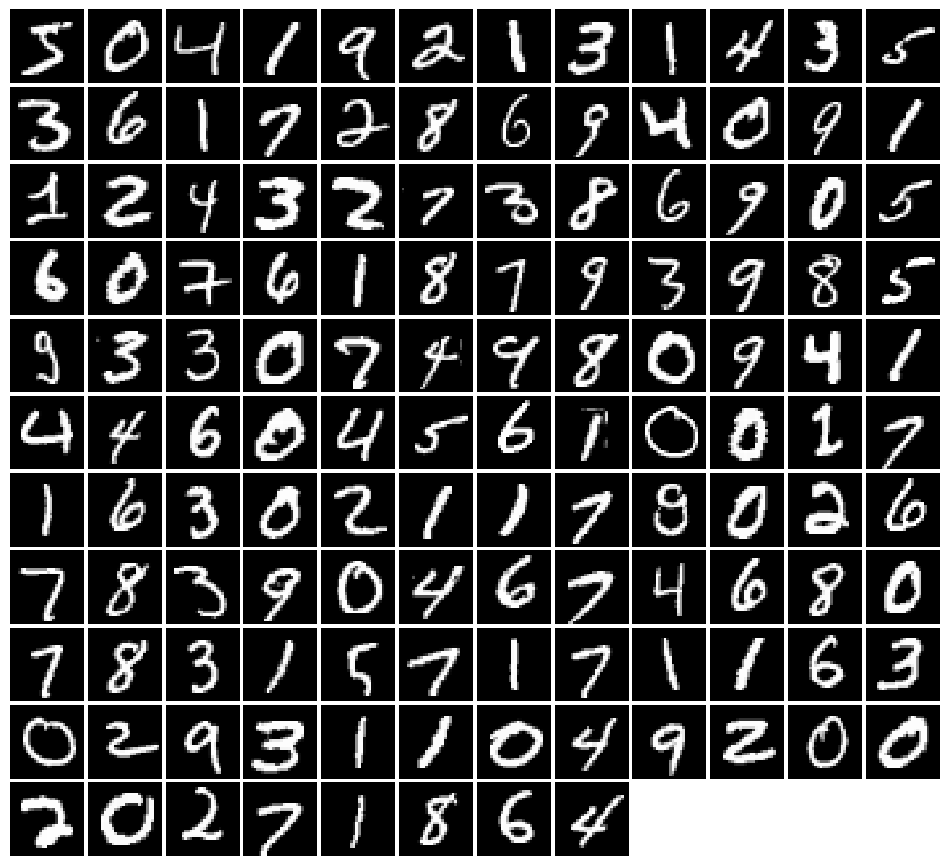

In [5]:
NUM_TRAIN = 50000
NUM_VAL = 5000

NOISE_DIM = 96
batch_size = 128


#MNIST dataÎ•º Î∞õÏùÑ Í≤ΩÎ°úÏÑ§Ï†ïÏùÑ Í∞ÅÏûê ÌôòÍ≤ΩÏóê ÎßûÍ≤å Ìï¥Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§
mnist_train = dset.MNIST(
    './cs231n/datasets/MNIST_data',
    train=True,
    download=True,
    transform=T.ToTensor()
)
loader_train = DataLoader(
    mnist_train,
    batch_size=batch_size,
    sampler=ChunkSampler(NUM_TRAIN, 0)
)

mnist_val = dset.MNIST(
    './cs231n/datasets/MNIST_data',
    train=True,
    download=True,
    transform=T.ToTensor()
)
loader_val = DataLoader(
    mnist_val,
    batch_size=batch_size,
    sampler=ChunkSampler(NUM_VAL, NUM_TRAIN)
)

imgs = next(loader_train.__iter__())[0].view(batch_size, 784).numpy().squeeze()
show_images(imgs)

## Random Noise : Input of Generation Network


# H.W 1

In [6]:
def sample_noise(batch_size, dim, seed=None):
    """
    Generate a PyTorch Tensor of uniform random noise.

    Input:
    - batch_size: Integer giving the batch size of noise to generate.
    - dim: Integer giving the dimension of noise to generate.

    Output:
    - A PyTorch Tensor of shape (batch_size, dim) containing uniform
      random noise in the range (-1, 1).
    """
    if seed is not None:
        torch.manual_seed(seed)

    # ************* START ******************
    # TODO : random noiseÎ•º ÎßåÎìúÎäî ÏãùÏùÑ ÏßúÏ£ºÏÑ∏Ïöî
    # Hint 1: -1Î∂ÄÌÑ∞ 1ÏÇ¨Ïù¥Ïùò uniform noiseÎ•º ÎßåÎì§Ïñ¥Ï£ºÏÑ∏Ïöî. shapeÏùÄ [batch_size, dim] ÏûÖÎãàÎã§.
    # Hint 2: torch.randÎ•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî
    noise = 2 * torch.rand(batch_size, dim) - 1


    return noise

    # ************* END ******************

In [7]:
def test_sample_noise():
    batch_size = 3
    dim = 4
    torch.manual_seed(231)
    z = sample_noise(batch_size, dim)
    np_z = z.cpu().numpy()
    assert np_z.shape == (batch_size, dim)
    assert torch.is_tensor(z)
    assert np.all(np_z >= -1.0) and np.all(np_z <= 1.0)
    assert np.any(np_z < 0.0) and np.any(np_z > 0.0)
    print('All tests passed!')

test_sample_noise()

All tests passed!


## Flatten & Unflatten & Weight initalization

Ïó¨Í∏∞ÏÑúÎäî 1Ï∞®ÏõêÏùò Î≤°ÌÑ∞Î•º ÎßåÎì§Ïñ¥Ï£ºÎäî flatten Ìï®ÏàòÏôÄ Í∑∏ Î∞òÎåÄÏù∏ unflatten, Í∑∏Î¶¨Í≥†  weight initializerÎ°ú ÏûêÏ£º Ïì∞Ïù¥Îäî Xavier initalizationÏùÑ ÏÜåÍ∞úÌï©ÎãàÎã§

In [8]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

class Unflatten(nn.Module):
    """
    An Unflatten module receives an input of shape (N, C*H*W) and reshapes it
    to produce an output of shape (N, C, H, W).
    """
    def __init__(self, N=-1, C=128, H=7, W=7):
        super(Unflatten, self).__init__()
        self.N = N
        self.C = C
        self.H = H
        self.W = W
    def forward(self, x):
        return x.view(self.N, self.C, self.H, self.W)

def initialize_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.ConvTranspose2d):
        nn.init.xavier_uniform_(m.weight.data)

# Discriminator

DiscriminatorÎäî ÏïÑÎûòÏôÄ Í∞ôÏùÄ Íµ¨Ï°∞ÏûÖÎãàÎã§.



 * Fully connected layer with input size 784 and output size 256
 * LeakyReLU with alpha 0.01
 * Fully connected layer with input_size 256 and output size 256
 * LeakyReLU with alpha 0.01
 * Fully connected layer with input size 256 and output size 1


*   ÎßàÏßÄÎßâ output shapeÏùÄ [batch_size, 1] ÌòïÌÉúÎ•º Í∞ñÏäµÎãàÎã§






In [9]:
def discriminator(seed=None):
    """
    Build and return a PyTorch model implementing the architecture above.
    """

    if seed is not None:
        torch.manual_seed(seed)

    model = None

    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784, 256),
        nn.LeakyReLU(0.01),
        nn.Linear(256, 256),
        nn.LeakyReLU(0.01),
        nn.Linear(256, 1)
    )

    return model


In [10]:
def test_discriminator(true_count=267009):
    model = discriminator()
    cur_count = count_params(model)
    if cur_count != true_count:
        print('Incorrect number of parameters in discriminator. Check your achitecture.')
    else:
        print('Correct number of parameters in discriminator.')

test_discriminator()

Correct number of parameters in discriminator.


# Generator

GeneratorÎäî ÏïÑÎûòÏôÄ Í∞ôÏùÄ Íµ¨Ï°∞ÏûÖÎãàÎã§



 * Fully connected layer from noise_dim to 1024
 * `ReLU`
 * Fully connected layer with size 1024
 * `ReLU`
 * Fully connected layer with size 784
 * `TanH` (to clip the image to be in the range of [-1,1])


In [11]:
def generator(noise_dim=NOISE_DIM, seed=None):
    """
    Build and return a PyTorch model implementing the architecture above.
    """

    if seed is not None:
        torch.manual_seed(seed)

    model = None

    model = nn.Sequential(
        nn.Linear(noise_dim, 1024),
        nn.ReLU(),
        nn.Linear(1024, 1024),
        nn.ReLU(),
        nn.Linear(1024, 784),
        nn.Tanh()
    )

    return model

In [12]:
def test_generator(true_count=1858320):
    model = generator(4)
    cur_count = count_params(model)
    if cur_count != true_count:
        print('Incorrect number of parameters in generator. Check your achitecture.')
    else:
        print('Correct number of parameters in generator.')

test_generator()

Correct number of parameters in generator.


# GAN Loss


##   Generator Loss
$$\ell_G  =  -\mathbb{E}_{z \sim p(z)}\left[\log D(G(z))\right]$$ <br>

## Discriminator Loss
$$ \ell_D = -\mathbb{E}_{x \sim p_\text{data}}\left[\log D(x)\right] - \mathbb{E}_{z \sim p(z)}\left[\log \left(1-D(G(z))\right)\right]$$ <Br>

Ïù¥ LossÎì§ÏùÑ minimizingÌïòÍ∏∞ ÏúÑÌï¥ ÏõêÎûò LossÏãùÏóê -Î•º Î∂ôÏòÄÏäµÎãàÎã§.

**HINTS**:

*   Discriminator logit ouputÏù¥ Ï£ºÏñ¥Ï°åÏùÑÎïå, true labelÏóê ÎåÄÌïú log probabilityÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ Binary cross entropyÎ•º Ïù¥Ïö©Ìï¥ÏïºÌï©ÎãàÎã§ (outputÏù¥ P_dataÏóêÏÑú ÎÇòÏò® Í¥ÄÏ∏°ÏπòÏù∏Í∞Ä?)
*   Binary cross entropy loss (s: score, y :label)

$$ bce(s, y) = -y * \log(s) - (1 - y) * \log(1 - s) $$ <Br>

*   Ìï¥Îãπ ÏãùÏùÑ ÎÇòÏù¥Î∏åÌïòÍ≤å Ï†ÅÏö©ÌïòÎ©¥ unstableÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏïÑÎûòÏùò bce Ìï®ÏàòÏóê stableÌïú implementationÏùÑ Ï†úÍ≥µÌïòÏòÄÏäµÎãàÎã§.
*   Loss Í≥ÑÏÇ∞Ïãú, labelÎì§ÏùÑ ÎπÑÍµêÌïòÏãúÎäî ÎåÄÏÉÅ logit sizeÏóê ÎßûÍ≤å ÎßûÏ∂∞Ï£ºÏãúÍ≥†, dtypeÏùÑ Ïù¥Ïö©Ìï¥ correct data typeÏúºÎ°ú castÌï¥Ï£ºÏÑ∏Ïöî!!

`true_labels = torch.ones(size).type(dtype)`

* $\log D(G(z))$, $\log D(x)$ and $\log \left(1-D(G(z))\right)$ Ïùò expectationÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Î∞©ÏãùÏù¥ ÏïÑÎãå, minibatch ÏõêÏÜåÏóê ÎåÄÌï¥ averagingÏùÑ Ï∑®ÌïòÎäî Î∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.



Test your generator and discriminator loss. You should see errors < 1e-7.

# H.W 2

GANÏùò lossÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§ <br>
ÏõêÎûòÎäî ÎëòÎã§ gradient ascentÎ•º ÏÇ¨Ïö©ÌïòÎäî maximizeÌòïÌÉúÏù¥ÎÇò,  -Î•º Î∂ôÏó¨Ï§åÏúºÎ°úÏç® minimizeÌï† Ïàò ÏûàÎèÑÎ°ù Î≥ÄÍ≤ΩÌñàÏäµÎãàÎã§ <br>
generator loss:

$$\ell_G  =  -\mathbb{E}_{z \sim p(z)}\left[\log D(G(z))\right]$$
Discriminator loss:
$$ \ell_D = -\mathbb{E}_{x \sim p_\text{data}}\left[\log D(x)\right] - \mathbb{E}_{z \sim p(z)}\left[\log \left(1-D(G(z))\right)\right]$$ <br>



*   Ìï¥Îãπ lossÎ•º ÏàòÏãù Í∑∏ÎåÄÎ°ú naiveÌïòÍ≤å Íµ¨ÌòÑÌïòÎäî Î∞©ÏãùÏùÄ numerically unstableÌï¥ stableÌïú Îã§Î•∏ Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÎäî Î∞©ÏãùÏùÑ Ï†úÏïàÌï©ÎãàÎã§.
*   real imageÏóê ÎåÄÌïú labelÏùÑ 1, fake imageÏóê ÎåÄÌïú labelÏùÑ 0ÏúºÎ°ú ÎëêÍ≥† , logit argumentÎ•º ÌÜµÌï¥ sizeÎ•º Í≤∞Ï†ïÌï©ÎãàÎã§.


*   Î∞òÎìúÏãú labelÍ≥º scoreÏùò sizeÎ•º ÎßûÏ∂∞Ï§òÏïº Ìï©ÎãàÎã§.
*   Log likelihoodÏóê ÎåÄÌïú expectationÏùÑ Í≥ÑÏÇ∞ÌïòÏßÄ ÏïäÍ≥†, minibatchÏùò Í∞íÏóê ÎåÄÌï¥ averagingÏùÑ Ï∑®Ìï¥ lossÎ•º Í≤∞Ìï©ÌïòÎäî Î∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§







In [43]:
def bce_loss(input, target):
    """
    Numerically stable version of the binary cross-entropy loss function.

    As per https://github.com/pytorch/pytorch/issues/751
    See the TensorFlow docs for a derivation of this formula:
    https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits

    Inputs:
    - input: PyTorch Tensor of shape (N, ) giving scores.
    - target: PyTorch Tensor of shape (N,) containing 0 and 1 giving targets.

    Returns:
    - A PyTorch Tensor containing the mean BCE loss over the minibatch of input data.
    """
    neg_abs = - input.abs()
    loss = input.clamp(min=0) - input * target + (1 + neg_abs.exp()).log()
    return loss.mean()

def discriminator_loss(logits_real, logits_fake):
    """
    Computes the discriminator loss described above.

    Inputs:
    - logits_real: PyTorch Tensor of shape (N,) giving scores for the real data.
    - logits_fake: PyTorch Tensor of shape (N,) giving scores for the fake data.

    Returns:
    - loss: PyTorch Tensor containing (scalar) the loss for the discriminator.
    """
    loss = None
    # ************* START ******************
    # TODO: Fake imageÏóê ÎåÄÌïú lossÏôÄ Real imageÏóê ÎåÄÌïú lossÎ•º Í∞ÅÍ∞Å Í≥ÑÏÇ∞ÌïòÍ≥† Í∑∏Í≤ÉÏùÑ Í≤∞Ìï©ÌïòÏÑ∏Ïöî
    # Hint: binary cross-entropyÎ∞©ÏãùÏúºÎ°ú Í∞Å elementÎì§Ïóê ÎåÄÌïú lossÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† Í∑∏Í≤ÉÏùÑ ÌèâÍ∑†ÌôîÌï©ÎãàÎã§ -> bce_loss ÏÇ¨Ïö©


    loss_fake = bce_loss(logits_fake, torch.zeros_like(logits_fake).type(dtype))
    loss_real = bce_loss(logits_real, torch.ones_like(logits_real).type(dtype))
    loss = (loss_fake + loss_real).mean()

    # ************* END ******************
    return loss


def generator_loss(logits_fake):
    """
    Computes the generator loss described above.

    Inputs:
    - logits_fake: PyTorch Tensor of shape (N,) giving scores for the fake data.

    Returns:
    - loss: PyTorch Tensor containing the (scalar) loss for the generator.
    """
    loss = None
    # ************* START ******************
    # TODO: Fake imageÏóê ÎåÄÌïú lossÎ•º Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî

    loss = bce_loss(logits_fake, torch.ones_like(logits_fake).type(dtype))
    # ************* END ******************
    return loss


In [44]:
def test_discriminator_loss(logits_real, logits_fake, d_loss_true):
    d_loss = discriminator_loss(torch.Tensor(logits_real).type(dtype),
                                torch.Tensor(logits_fake).type(dtype)).cpu().numpy()
    print("Maximum error in d_loss: %g"%rel_error(d_loss_true, d_loss))

test_discriminator_loss(
    answers['logits_real'],
    answers['logits_fake'],
    answers['d_loss_true']
)

Maximum error in d_loss: 3.97058e-09


# Optimizing our Loss

# Training a GAN!



# H.W 3

In [45]:
def get_optimizer(model):
    """
    Construct and return an Adam optimizer for the model with learning rate 1e-3,
    beta1=0.5, and beta2=0.999.

    Input:
    - model: A PyTorch model that we want to optimize.

    Returns:
    - An Adam optimizer for the model with the desired hyperparameters.
    """
    optimizer = None
    # ************* START ******************
    #TODO : ÏõêÌïòÏãúÎäî optimizerÎ•º ÏûêÏú†Î°≠Í≤å ÏÑ§Ï†ïÌï¥Î≥¥ÏÑ∏Ïöî, learning rate Ï°∞Ï†à Î∞è schedulerÎèÑ Ï†ÅÏö©Ìï¥Î≥¥ÏÑ∏Ïöî

    optimizer = optim.Adam(model.parameters(), lr = 0.001, betas = (0.5,0.999))

    # ************* END ******************
    return optimizer


def run_a_gan(D, G, D_solver, G_solver, discriminator_loss, generator_loss, loader_train, show_every=250,
              batch_size=128, noise_size=96, num_epochs=10):
    """
    Train a GAN!

    Inputs:
    - D, G: PyTorch models for the discriminator and generator
    - D_solver, G_solver: torch.optim Optimizers to use for training the
      discriminator and generator.
    - discriminator_loss, generator_loss: Functions to use for computing the generator and
      discriminator loss, respectively.
    - show_every: Show samples after every show_every iterations.
    - batch_size: Batch size to use for training.
    - noise_size: Dimension of the noise to use as input to the generator.
    - num_epochs: Number of epochs over the training dataset to use for training.

    """
    images = []
    iter_count = 0
    for epoch in range(num_epochs):
        for x, _ in loader_train: #xÎäî Ïñ¥Îñ§ dataÏùºÍπåÏöî?
            if len(x) != batch_size:
                continue


            # ************* START ******************
            #TODO 1. Discriminator ÌïôÏäµÍ≥ºÏ†ï
            # Real dataÏóê ÎåÄÌïú ÌåêÎ≥ÑÍ≥º, fake_imageÏóê ÎåÄÌïú ÌåêÎ≥Ñ ÎëêÍ∞ÄÏßÄÎ•º ÏßÑÌñâÌï¥Ïïº Ìï©ÎãàÎã§
            # Discriminator_lossÏôÄ generator_lossÎäî ÏúÑ Ìï®Ïàò Ïù∏ÏûêÏóêÏÑú Î∞õÍ≥† ÏûàÏäµÎãàÎã§.

            D_solver.zero_grad()
            real_data = x.type(dtype)  # <- DiscriminatorÏóê Îì§Ïñ¥Í∞à inputÏûÖÎãàÎã§
            logits_real = D(2*(real_data - 0.5)).type(dtype) # <- MNISTÏùò image sizeÎäî 28x28ÏûÖÎãàÎã§

            g_fake_seed =sample_noise(batch_size, noise_size).type(dtype)  #  <- GeneratorÏóê Îì§Ïñ¥Í∞à inputÏûÖÎãàÎã§
            fake_images = G(g_fake_seed)
            logits_fake = D(fake_images.view(batch_size,1,28,28))   # <- MNISTÏùò image sizeÎäî 28x28ÏûÖÎãàÎã§

            d_total_error = discriminator_loss(logits_real, logits_fake)
            d_total_error.backward()
            D_solver.step()


            #TODO 2. Generator ÌïôÏäµÍ≥ºÏ†ï
            #fake_imageÏóê ÎåÄÌï¥ÏÑúÎßå lossÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
            #DiscriminatorÏôÄ ÎπÑÏä∑Ìïú Î∞©ÏãùÏúºÎ°ú Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏ ÌïòÎäî Í≤ÉÍπåÏßÄ ÏΩîÎìúÎ•º ÏßúÏ£ºÏÑ∏Ïöî
            #Ìï®Ïàò ParameterÏóê ÏûàÎäî G_solverÎ•º Î≥ÄÏàòÎ°ú Ïç®Ï£ºÏÑ∏Ïöî!


            G_solver.zero_grad()
            g_fake_seed = sample_noise(batch_size, noise_size).type(dtype)
            fake_images = G(g_fake_seed)

            logits_fake2 = D(fake_images.view(batch_size, 1, 28, 28))
            g_error = generator_loss(logits_fake2)
            g_error.backward()
            G_solver.step()

            # ************* END ******************

            if (iter_count % show_every == 0):
                print('Iter: {}, D: {:.4}, G:{:.4}'.format(iter_count,d_total_error.item(),g_error.item()))
                imgs_numpy = fake_images.data.cpu().numpy()
                images.append(imgs_numpy[0:16])

            iter_count += 1

    return images

In [46]:
# Make the discriminator
D = discriminator().type(dtype)

# Make the generator
G = generator().type(dtype)

# Use the function you wrote earlier to get optimizers for the Discriminator and the Generator
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)

# Run it!
images = run_a_gan(
    D,
    G,
    D_solver,
    G_solver,
    discriminator_loss,
    generator_loss,
    loader_train
)

Iter: 0, D: 1.328, G:0.7202
Iter: 250, D: 1.433, G:0.5436
Iter: 500, D: 0.928, G:1.357
Iter: 750, D: 1.937, G:0.4173
Iter: 1000, D: 1.148, G:0.9724
Iter: 1250, D: 1.903, G:1.233
Iter: 1500, D: 1.236, G:0.8859
Iter: 1750, D: 1.4, G:0.7455
Iter: 2000, D: 1.349, G:0.8479
Iter: 2250, D: 1.281, G:0.8561
Iter: 2500, D: 1.407, G:0.7538
Iter: 2750, D: 1.356, G:0.7374
Iter: 3000, D: 1.294, G:0.8608
Iter: 3250, D: 1.338, G:0.7491
Iter: 3500, D: 1.281, G:0.7786
Iter: 3750, D: 1.254, G:0.9261


Run the cell below to show the generated images.

Iter: 0


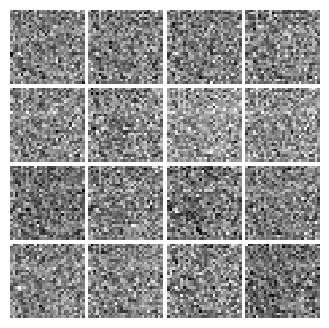


Iter: 250


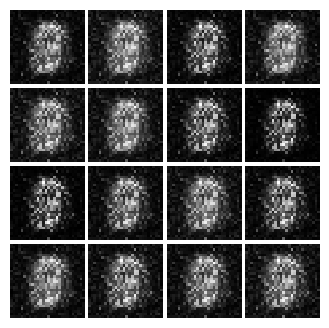


Iter: 500


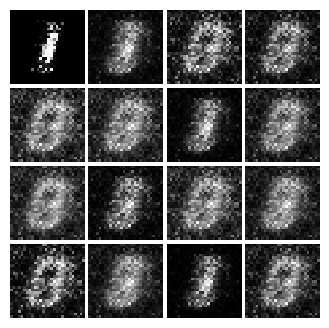


Iter: 750


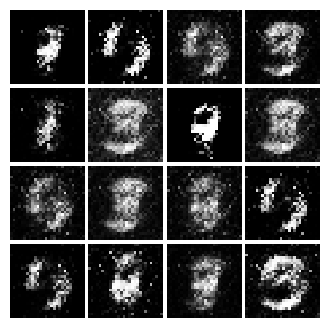


Iter: 1000


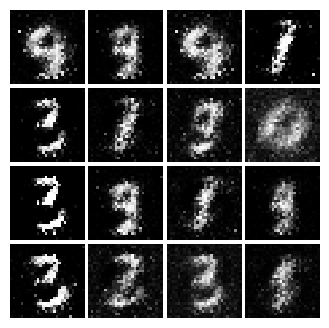


Iter: 1250


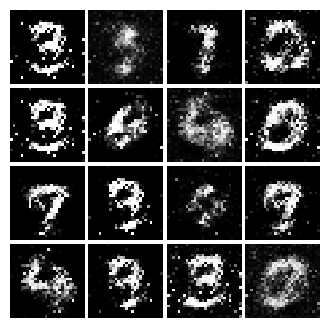


Iter: 1500


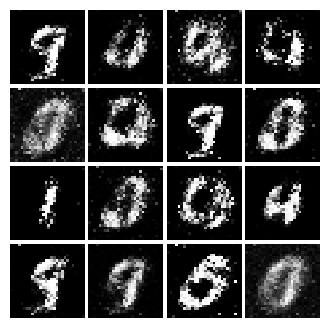


Iter: 1750


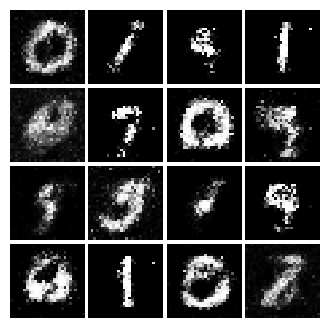


Iter: 2000


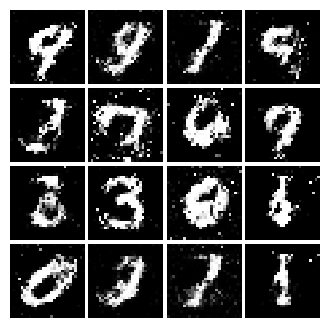


Iter: 2250


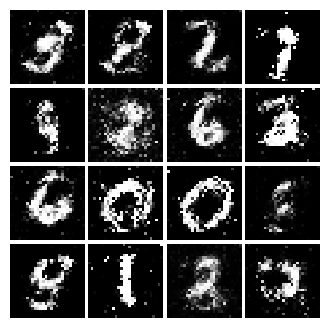


Iter: 2500


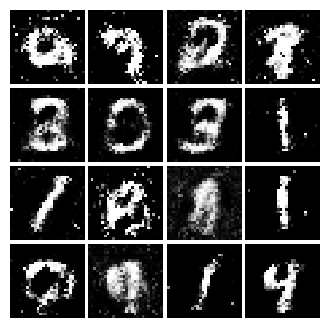


Iter: 2750


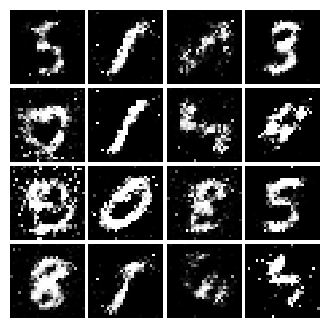


Iter: 3000


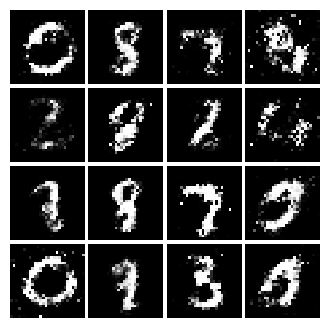


Iter: 3250


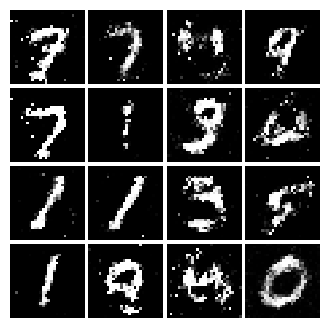


Iter: 3500


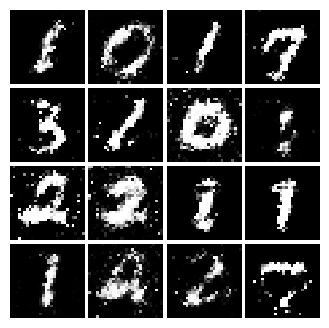


Iter: 3750


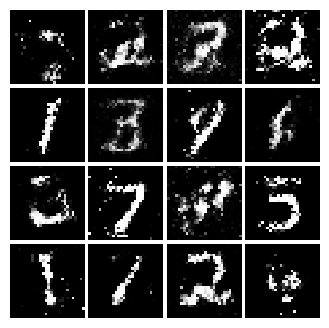

In [47]:
numIter = 0
for img in images:
    print("Iter: {}".format(numIter))
    show_images(img)
    plt.show()
    numIter += 250
    print()

Vanilla GAN output image

Vanilla GAN final image:


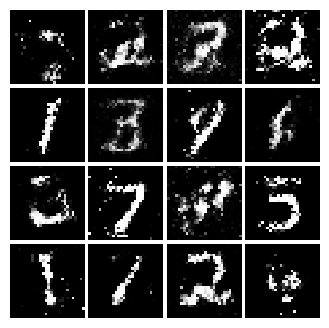

In [48]:
# This output is your answer.
print("Vanilla GAN final image:")
show_images(images[-1])
plt.show()

# Least Squares GAN
LSGANÏùÄ original GANÏùò unstable loss functionÏùÑ Í∞úÏÑ†Ìïú GANÏûÖÎãàÎã§.
Î™®Îç∏ Íµ¨Ï°∞Îäî Î∞îÎÄåÏßÄ ÏïäÏïòÏßÄÎßå loss functionÏù¥ Ïù¥Ï†ÑÍ≥º Îã§Î¶ÖÎãàÎã§. <br>
[Least Squares GAN](https://arxiv.org/abs/1611.04076)



## Generation loss

$$\ell_G  =  \frac{1}{2}\mathbb{E}_{z \sim p(z)}\left[\left(D(G(z))-1\right)^2\right]$$ <br>

## Discriminator loss
$$ \ell_D = \frac{1}{2}\mathbb{E}_{x \sim p_\text{data}}\left[\left(D(x)-1\right)^2\right] + \frac{1}{2}\mathbb{E}_{z \sim p(z)}\left[ \left(D(G(z))\right)^2\right]$$ <br>


*   ÏïûÏùò Vanilla GAN lossÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú expectationÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Î∞©ÏãùÏù¥ ÏïÑÎãå, minibatch ÏõêÏÜåÏóê ÎåÄÌï¥ averagingÏùÑ Ï∑®ÌïòÎäî Î∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

*    $D(x)$ and $D(G(z))$ Îäî discriminator (`scores_real` and `scores_fake`).ÏóêÏÑú ÎÇòÏò® direct outputÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.



# H.W 4

In [49]:
def ls_discriminator_loss(scores_real, scores_fake):
    """
    Compute the Least-Squares GAN loss for the discriminator.

    Inputs:
    - scores_real: PyTorch Tensor of shape (N,) giving scores for the real data.
    - scores_fake: PyTorch Tensor of shape (N,) giving scores for the fake data.

    Outputs:
    - loss: A PyTorch Tensor containing the loss.
    """
    loss = None
    ##############################################################################
    # TODO: LSGANÏùò Discriminator lossÎ•º Íµ¨ÌòÑÌï¥Î≥¥ÏÑ∏Ïöî (MarkdownÏóê Ï†ÅÌòÄÏûàÎäî ÏàòÏãùÏùÑ Ï∞∏Í≥†ÌïòÏÑ∏Ïöî)                                                                                 #
    ##############################################################################
    # ************* START ******************

    loss = 0.5 * (scores_real-1).square().mean() + 0.5 * scores_fake.square().mean()


    # ************* END ******************
    return loss

def ls_generator_loss(scores_fake):
    """
    Computes the Least-Squares GAN loss for the generator.

    Inputs:
    - scores_fake: PyTorch Tensor of shape (N,) giving scores for the fake data.

    Outputs:
    - loss: A PyTorch Tensor containing the loss.
    """
    loss = None
    ##############################################################################
    # TODO: LSGANÏùò Generator lossÎ•º Íµ¨ÌòÑÌï¥Î≥¥ÏÑ∏Ïöî (MarkdownÏóê Ï†ÅÌòÄÏûàÎäî ÏàòÏãùÏùÑ Ï∞∏Í≥†ÌïòÏÑ∏Ïöî)                                                                                 #
    ##############################################################################
    # ************* START ******************


    loss = 0.5 * (scores_fake-1).square().mean()
    # ************* END ******************
    return loss

In [50]:
def test_lsgan_loss(score_real, score_fake, d_loss_true, g_loss_true):
    score_real = torch.Tensor(score_real).type(dtype)
    score_fake = torch.Tensor(score_fake).type(dtype)
    d_loss = ls_discriminator_loss(score_real, score_fake).cpu().numpy()
    g_loss = ls_generator_loss(score_fake).cpu().numpy()
    print("Maximum error in d_loss: %g"%rel_error(d_loss_true, d_loss))
    print("Maximum error in g_loss: %g"%rel_error(g_loss_true, g_loss))

test_lsgan_loss(
    answers['logits_real'],
    answers['logits_fake'],
    answers['d_loss_lsgan_true'],
    answers['g_loss_lsgan_true']
)

Maximum error in d_loss: 1.53171e-08
Maximum error in g_loss: 2.7837e-09


Run the following cell to train your model!

In [51]:
D_LS = discriminator().type(dtype)
G_LS = generator().type(dtype)

D_LS_solver = get_optimizer(D_LS)
G_LS_solver = get_optimizer(G_LS)

images = run_a_gan(
    D_LS,
    G_LS,
    D_LS_solver,
    G_LS_solver,
    ls_discriminator_loss,
    ls_generator_loss,
    loader_train
)

Iter: 0, D: 0.5689, G:0.51
Iter: 250, D: 0.1679, G:0.2804
Iter: 500, D: 0.1211, G:0.5155
Iter: 750, D: 0.1365, G:0.4879
Iter: 1000, D: 0.1683, G:0.4999
Iter: 1250, D: 0.1682, G:0.3379
Iter: 1500, D: 0.1992, G:0.2174
Iter: 1750, D: 0.2449, G:0.1706
Iter: 2000, D: 0.2153, G:0.2307
Iter: 2250, D: 0.2342, G:0.1868
Iter: 2500, D: 0.2204, G:0.1506
Iter: 2750, D: 0.2158, G:0.1797
Iter: 3000, D: 0.2095, G:0.1698
Iter: 3250, D: 0.254, G:0.1719
Iter: 3500, D: 0.2229, G:0.1503
Iter: 3750, D: 0.2338, G:0.1612


Run the cell below to show generated images.

Iter: 0


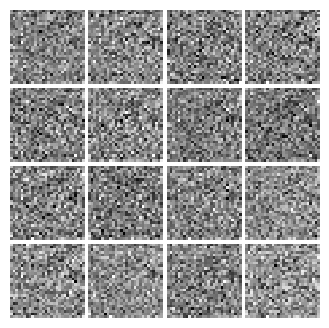


Iter: 250


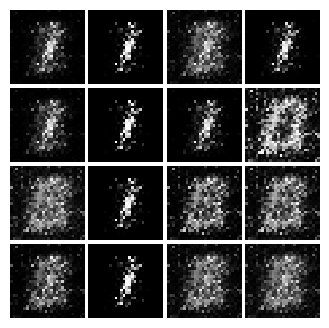


Iter: 500


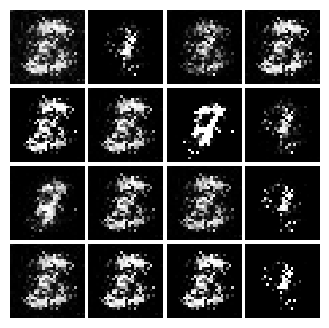


Iter: 750


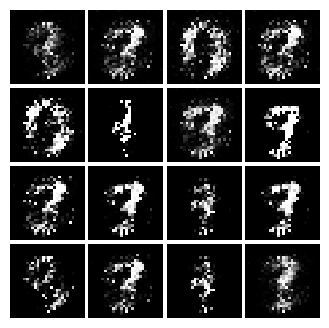


Iter: 1000


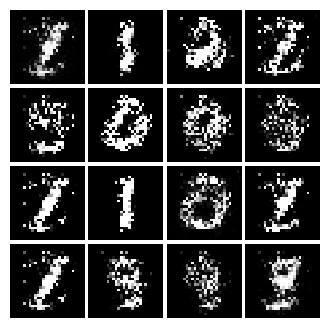


Iter: 1250


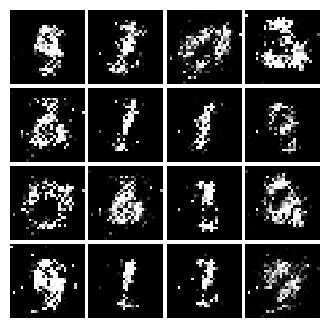


Iter: 1500


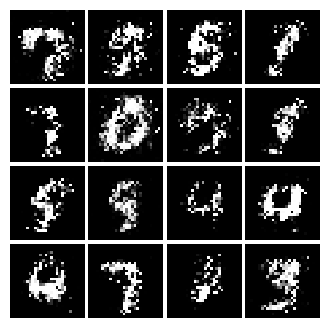


Iter: 1750


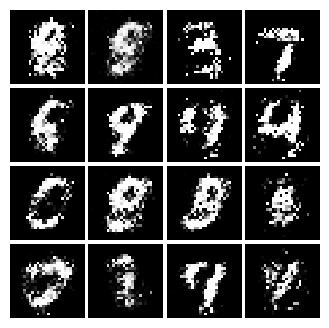


Iter: 2000


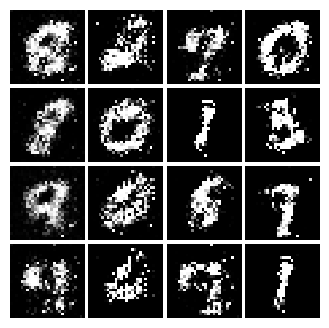


Iter: 2250


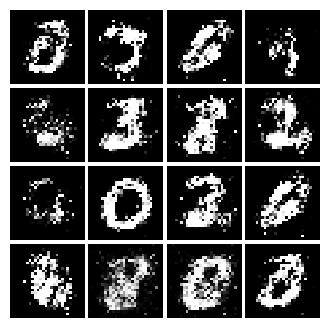


Iter: 2500


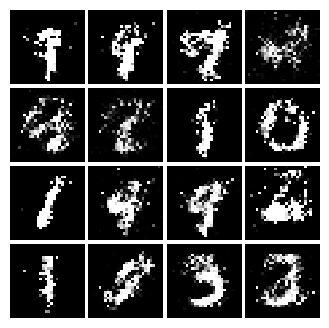


Iter: 2750


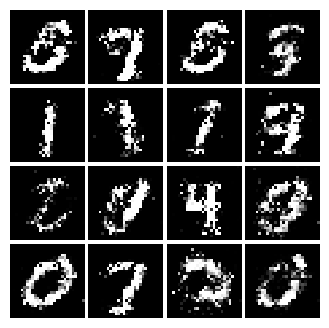


Iter: 3000


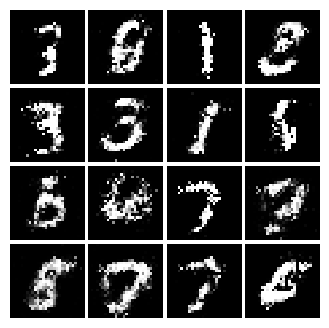


Iter: 3250


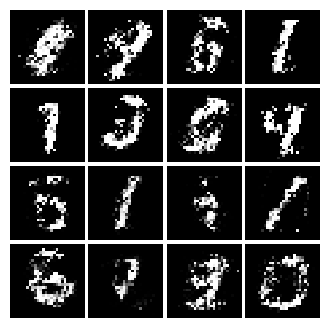


Iter: 3500


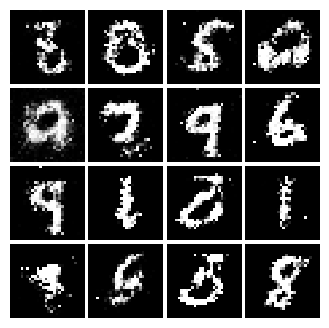


Iter: 3750


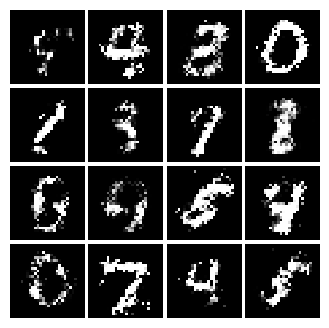

In [52]:
numIter = 0
for img in images:
    print("Iter: {}".format(numIter))
    show_images(img)
    plt.show()
    numIter += 250
    print()

LSGAN output image

LSGAN final image:


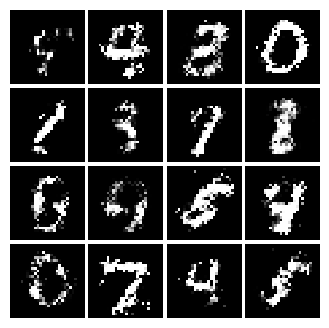

In [53]:
# This output is your answer.
print("LSGAN final image:")
show_images(images[-1])
plt.show()

# Deeply Convolutional GANs
Orginial GANÍ≥º Îã¨Î¶¨ Convolutional layerÎ•º Î≥∏Í≤©Ï†ÅÏúºÎ°ú ÎèÑÏûÖÌïú DCGANÏùÑ ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî! <br>
[DCGAN](https://arxiv.org/abs/1511.06434)



# H.W 5

#### Discriminator

ÏïÑÎûòÏùò Discriminator architectureÎ•º ÏΩîÎìúÎ°ú ÏßúÏ£ºÏÑ∏Ïöî!


* Reshape into image tensor (Use Unflatten!)
* Conv2D: 32 Filters, 5x5, Stride 1
* Leaky ReLU(alpha=0.01)
* Max Pool 2x2, Stride 2
* Conv2D: 64 Filters, 5x5, Stride 1
* Leaky ReLU(alpha=0.01)
* Max Pool 2x2, Stride 2
* Flatten
* Fully Connected with output size 4 x 4 x 64
* Leaky ReLU(alpha=0.01)
* Fully Connected with output size 1

In [54]:
def build_dc_classifier(batch_size):
    """
    Build and return a PyTorch model for the DCGAN discriminator implementing
    the architecture above.
    """

    ##############################################################################
    # TODO: DiscriminatorÎ•º buildÌïòÏÑ∏Ïöî                                                                                           #
    # HINT: nn.SequentialÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Ìé∏Ìï©ÎãàÎã§
    ##############################################################################
    # ************* START ******************

    model = nn.Sequential(
        Unflatten(N=batch_size, C=1, H=28, W=28),
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1),
        nn.LeakyReLU(0.01),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.Conv2d(in_channels=32,out_channels=64, kernel_size=5,stride=1),
        nn.LeakyReLU(0.01),
        nn.MaxPool2d(kernel_size=2,stride=2),
        Flatten(),
        nn.Linear(4*4*64,4*4*64),
        nn.LeakyReLU(0.01),
        nn.Linear(4*4*64,1),
    )

    return model
    # ************* END ******************
    ##############################################################################
    #                               END OF YOUR CODE                             #
    ##############################################################################

In [55]:
data = next(enumerate(loader_train))[-1][0].type(dtype)
b = build_dc_classifier(batch_size).type(dtype)
out = b(data)
print(out.size())

torch.Size([128, 1])


Check the number of parameters in your classifier as a sanity check:

In [56]:
def test_dc_classifer(true_count=1102721):
    model = build_dc_classifier(batch_size)
    cur_count = count_params(model)
    if cur_count != true_count:
        print('Incorrect number of parameters in generator. Check your achitecture.')
    else:
        print('Correct number of parameters in generator.')

test_dc_classifer()

Correct number of parameters in generator.


#### Generator
DCGANÏóêÏÑú ÏÇ¨Ïö©Ìï† generatorÏùò Íµ¨Ï°∞Îäî  InfoGAN paperÏùò Íµ¨Ï°∞ÏôÄ ÎèôÏùºÌï©ÎãàÎã§ <br>
[InfoGAN paper](https://arxiv.org/pdf/1606.03657.pdf). <br>
ÏàòÏóÖ ÏãúÍ∞ÑÏóê ÎßêÌïú upsampling Í∏∞Î≤ïÎèÑ transpose convolutionÏúºÎ°ú ÏàòÌñâÌïòÎãà ÏïÑÎûòÏùò architectureÎ•º ÏΩîÎìúÎ°ú ÏßúÏ£ºÏÑ∏Ïöî!

* Fully connected with output size 1024
* `ReLU`
* BatchNorm
* Fully connected with output size 7 x 7 x 128
* ReLU
* BatchNorm
* Reshape into Image Tensor of shape 7, 7, 128
* Conv2D^T (Transpose): 64 filters of 4x4, stride 2, 'same' padding (use `padding=1`)
* `ReLU`
* BatchNorm
* Conv2D^T (Transpose): 1 filter of 4x4, stride 2, 'same' padding (use `padding=1`)
* `TanH`
* Should have a 28x28x1 image, reshape back into 784 vector



#H.W 6

In [61]:
def build_dc_generator(noise_dim=NOISE_DIM):
    """
    Build and return a PyTorch model implementing the DCGAN generator using
    the architecture described above.
    """

    ##############################################################################
    # TODO: GeneratorÎ•º buildÌïòÏÑ∏Ïöî                                                                                           #
    # HINT: nn.SequentialÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Ìé∏Ìï©ÎãàÎã§
    ##############################################################################
    # ************* START ******************

    model = nn.Sequential(
        nn.Linear(NOISE_DIM,1024),
        nn.ReLU(),
        nn.BatchNorm1d(1024),
        nn.Linear(1024,7*7*128),
        nn.ReLU(),
        nn.BatchNorm1d(7*7*128),
        Unflatten(C=128,W=7,H=7),
        nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=4, stride=2, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.ConvTranspose2d(in_channels=64, out_channels=1, kernel_size=4, stride=2, padding=1),
        nn.Tanh(),
        Flatten()


    )


    return model
    # ************* END ******************

In [62]:
test_g_gan = build_dc_generator().type(dtype)
test_g_gan.apply(initialize_weights)

fake_seed = torch.randn(batch_size, NOISE_DIM).type(dtype)
fake_images = test_g_gan.forward(fake_seed)
fake_images.size()

torch.Size([128, 784])

Check the number of parameters in your generator as a sanity check:

In [63]:
def test_dc_generator(true_count=6580801):
    model = build_dc_generator(4)
    cur_count = count_params(model)
    if cur_count != true_count:
        print('Incorrect number of parameters in generator. Check your achitecture.')
    else:
        print('Correct number of parameters in generator.')

test_dc_generator()

Incorrect number of parameters in generator. Check your achitecture.


In [64]:
D_DC = build_dc_classifier(batch_size).type(dtype)
D_DC.apply(initialize_weights)
G_DC = build_dc_generator().type(dtype)
G_DC.apply(initialize_weights)

D_DC_solver = get_optimizer(D_DC)
G_DC_solver = get_optimizer(G_DC)

images = run_a_gan(
    D_DC,
    G_DC,
    D_DC_solver,
    G_DC_solver,
    discriminator_loss,
    generator_loss,
    loader_train,
    num_epochs=5
)

Iter: 0, D: 1.303, G:0.645
Iter: 250, D: 1.417, G:0.6025
Iter: 500, D: 1.317, G:1.138
Iter: 750, D: 1.28, G:0.9857
Iter: 1000, D: 1.299, G:1.045
Iter: 1250, D: 1.266, G:0.847
Iter: 1500, D: 1.147, G:1.068
Iter: 1750, D: 1.375, G:0.6811


Run the cell below to show generated images.

Iter: 0


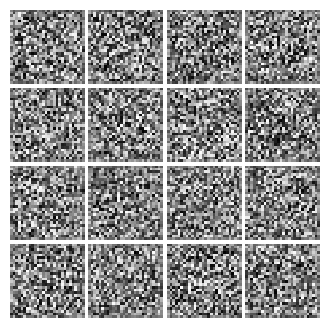


Iter: 250


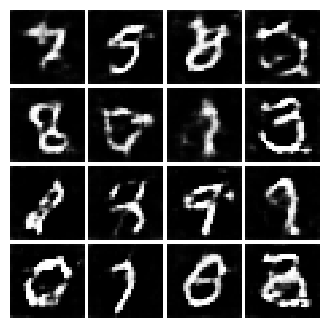


Iter: 500


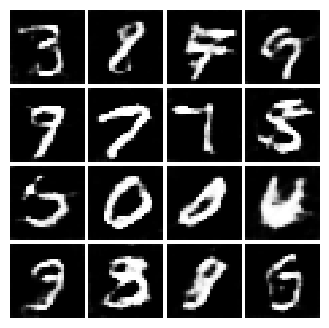


Iter: 750


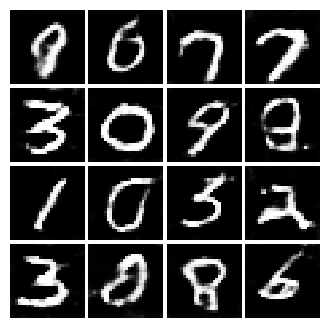


Iter: 1000


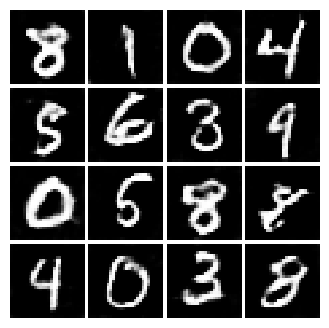


Iter: 1250


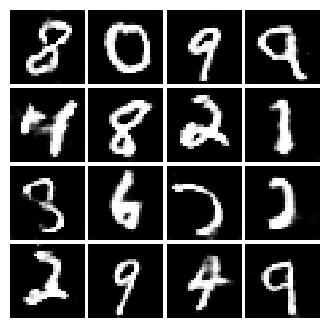


Iter: 1500


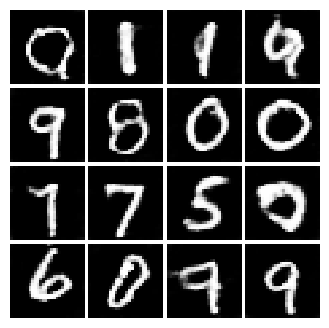


Iter: 1750


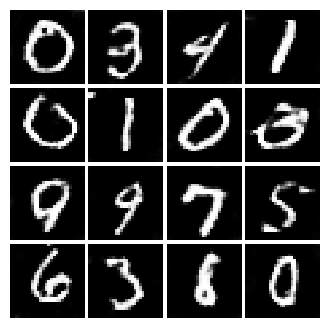

In [65]:
numIter = 0
for img in images:
    print("Iter: {}".format(numIter))
    show_images(img)
    plt.show()
    numIter += 250
    print()

DCGAN output image

DCGAN final image:


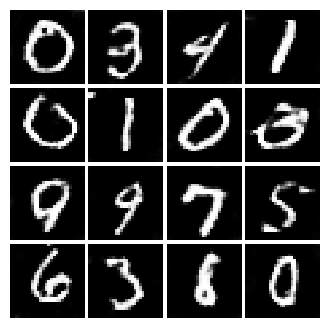

In [66]:
# This output is your answer.
print("DCGAN final image:")
show_images(images[-1])
plt.show()